In [5]:
import os 
import io
import warnings 
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
from dotenv import dotenv_values
config = dotenv_values(".env")

stability_api = client.StabilityInference(
    key=config["StableDif"],
    verbose=True,
)

In [6]:
answers = stability_api.generate(
    prompt="Cute kitten",
    seed=992446758,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    samples=1,
    sampler=generation.SAMPLER_K_DPMPP_2M
)

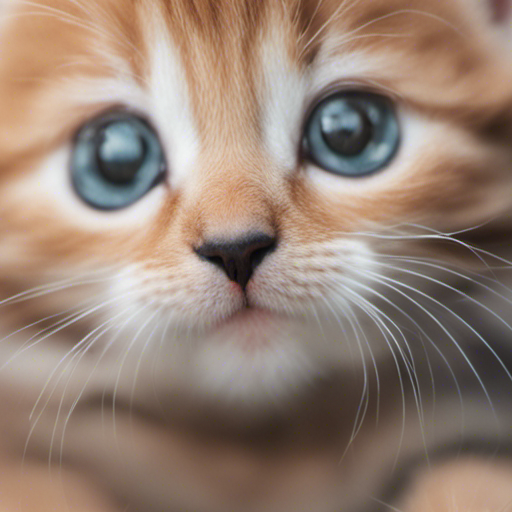

In [7]:
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)
#             img.save(str(artifact.seed)+ ".png") # Save our generated images with their seed number as the filename.